# Extending the Markov chain example

In this notebook, I will be extending the Markov chain example from Stochastic modelling course, Module 5, Lesson 01. The specific example I will be extending is the simulation of Markov processes to more than two states (states determined by the user) and delves deeper into the example.

This notebook is for educational purposes to understand about Markov a little bit better and might not be structured in a way that is practical but more verbose in the explanation and approach.

## Introduction

We discussed a discrete Markov process to have the following property:

*   $\mathbb{P}(s_{t+1}|s_{t},a_{t})=\mathbb{P}(s_{t+1}|s_{t},a_{t},...,s_{0},a_{0})$

**Interpretation:** The next state depends only on the current state.

Now, for each states, if we already know the probability of it transitioning to another state ( including staying in its current state) we can neatly organize the probabilities in a matrix $P$ (symbol used for consistency of annotation with the course) with the matrix dimension of $NxN$ (where $N$ is the number of states) that summarizes all the transistion probabilites. Mathematically, we can write it as follows:

*   $\mathbb{P}(S_{t+1} = j |s_{t} = i)= p_{ji}$

where $p_{ji}$ is the entries of the $i^{th}$ column and $j^{th}$ row of the matrix $P$

## Simulation

Here, we will first simulate the process for $N$ states and discuss further into some of the results that arise from the simulation. 

In [1]:
# LIBRARIES WE USE IN THE NOTEBOOK
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import rand, seed, choice

#### Defining the Transition Matrix
In order to simplify entry of transition matrix, we will create a simple entry form that will allow users to enter a valid row that sums to one with the format $p_1$,$p_2$,$p_3$... (all values separated by a comma)

In [2]:
# Enter number of states
num_states = 2

# Initialize the transition matrix
P = np.zeros([num_states,num_states])

In [3]:
# A simple algorithm that allows you to input a valid row in the transition matrix

for row in range(num_states):
    row_array = np.zeros(num_states)
    while row_array.sum() != 1:
        row_array = np.array(
            
            eval(input("Please enter the row values by separating them with a comma: (it should add up to 1)"))
        
        )
    
    # Append a valid row array
    P[row,:] = row_array
        
    
    


Please enter the row values by separating them with a comma: (it should add up to 1)0.55,0.45
Please enter the row values by separating them with a comma: (it should add up to 1)0.45,0.55


In [4]:
# And we have our transition matrix
P

array([[0.55, 0.45],
       [0.45, 0.55]])

In [5]:
LEN_HIST = 50


# Now lets define states. For states we can simply annotate strings to thes states 
# as this is a generic model. We also need to append values to this states to create
# a Markov process X_t as well that depends on the Markov chain s_t.


state_annotate = [i for i in range(num_states)]

# value annotation - we can append any value here as it is generic, but to be consistent with
# the lesson notes, let us limit the values to be between -1 and 1.

state_values = np.linspace(-1,1,num_states,endpoint=True)


# Get the state dictionary
state = {annotate:value for annotate,value in zip(state_annotate,state_values)}



In [6]:
# Now let us initalize some values.


# initializing Xt[0]
Xt = np.zeros(LEN_HIST)
Xt[0] = 75

# initialize simulated states across time and the values too.
sim_state = np.zeros([LEN_HIST,2])
# Pick the first state as the initial state, we can change the different state
init_state = 0
sim_state[0] = [list(state.keys())[init_state],state[list(state.keys())[init_state]]]

# initialize state switch count to be used later for redesigning matrix
Psim = np.zeros([num_states,num_states])


In [7]:
"""
# Now lets simulate the markov process 

# Firstly we need to redefine "probabilities" to simulate when an event with a probability 'p' might occur

using the frequentist approach, we can assume that an event occurs p X 100 % of the time
and develop an algorithm that simulates that.
"""

for tt in range(1,LEN_HIST):
    
    # choose the next state state based on the transition matrix probabilities
    st = choice(state_annotate,1,p = P[int(sim_state[tt-1][0])])[0]
    sim_state[tt] = [st,state[st]]
    Psim[int(sim_state[tt-1][0]),int(st)] = 1 + Psim[int(sim_state[tt-1][0]),int(st)]
    Xt[tt] = Xt[tt-1] + sim_state[tt][1]


    
    


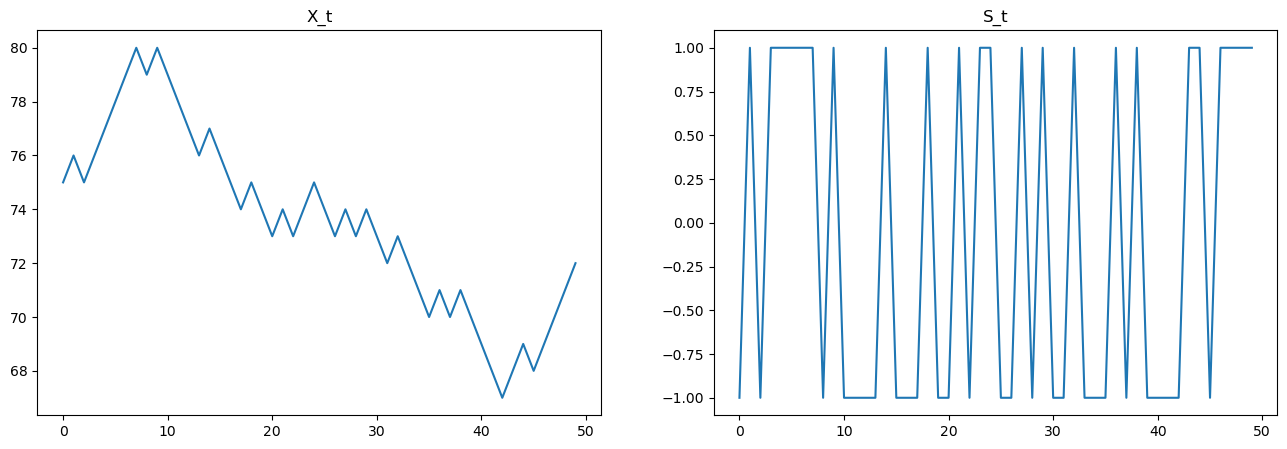

In [8]:
# Now let us just plot the points
# Plot the evolution of the X_t and s_t
plt.subplot(1, 2, 1)
plt.plot(Xt)
plt.title("X_t")

plt.subplot(1, 2, 2)
plt.plot(sim_state[:, 1])
plt.title("S_t")

fig = plt.gcf()
fig.set_size_inches(16, 5)
plt.show()

#### Can we recreate the transition matrix from the simulated process?
To do this, we will now use the `Psim` log and divide it by the entire process iteration to get simulated transition states

In [9]:
P_simulated = Psim/np.sum(Psim, axis=1)

In [10]:
P_simulated

array([[0.48148148, 0.63636364],
       [0.48148148, 0.40909091]])

This makes sense as the number of sample is small and we can also see a pattern of the original transition matrix here. For a lot of samples it should converge.

In [11]:
# Lets create a function that summarizes the algo..

def gen_markov_states(P,LEN_HIST):
    # Now lets define states. For states we can simply annotate strings to thes states 
    # as this is a generic model. We also need to append values to this states to create
    # a Markov process X_t as well that depends on the Markov chain s_t.


    state_annotate = [i for i in range(num_states)]

    # value annotation - we can append any value here as it is generic, but to be consistent with
    # the lesson notes, let us limit the values to be between -1 and 1.

    state_values = np.linspace(-1,1,num_states,endpoint=True)


    # Get the state dictionary
    state = {annotate:value for annotate,value in zip(state_annotate,state_values)}
    # Now let us initalize some values.
    
    # initializing Xt[0]
    Xt = np.zeros(LEN_HIST)
    Xt[0] = 75

    # initialize simulated states across time and the values too.
    sim_state = np.zeros([LEN_HIST,2])
    # Pick the first state as the initial state, we can change the different state
    init_state = 0
    sim_state[0] = [list(state.keys())[init_state],state[list(state.keys())[init_state]]]

    # initialize state switch count to be used later for redesigning matrix
    Psim = np.zeros([num_states,num_states])
    """
    # Now lets simulate the markov process 

    # Firstly we need to redefine "probabilities" to simulate when an event with a probability 'p' might occur

    using the frequentist approach, we can assume that an event occurs p X 100 % of the time
    and develop an algorithm that simulates that.
    """
    
    for tt in range(1,LEN_HIST):

        # choose the next state state based on the transition matrix probabilities
        st = choice(state_annotate,1,p = P[int(sim_state[tt-1][0])])[0]
        sim_state[tt] = [st,state[st]]
        Psim[int(sim_state[tt-1][0]),int(st)] = 1 + Psim[int(sim_state[tt-1][0]),int(st)]
        Xt[tt] = Xt[tt-1] + sim_state[tt][1]
        
    return sim_state,Xt,Psim

    

In [12]:
Psim = gen_markov_states(P,1000)[2]

In [13]:
P_simulated = Psim/np.sum(Psim, axis=1)

In [14]:
P_simulated

array([[0.56704981, 0.47379455],
       [0.43103448, 0.52830189]])

As can be shown, we can recreate the transition matrix from large samples